In [1]:
"""Elementary imports: """
import os
import json
import glob
import argparse

"""numpy/scipy imports:"""
import numpy as np
from scipy import signal as sg
import scipy.ndimage as ndimage


"""PIL imports:"""
from PIL import Image

"""matplotlib imports:"""
import matplotlib.pyplot as plt

In [30]:
image = np.array(Image.open("berlin_000001_000019_leftImg8bit.png"))

In [36]:
im_red = image[:, :, 0]
im_green = image[:, :, 1]

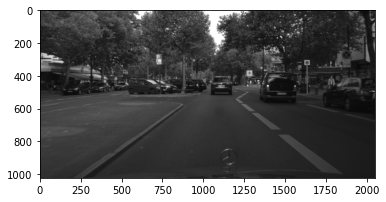

In [40]:
plt.imshow(im_red, cmap='gray')

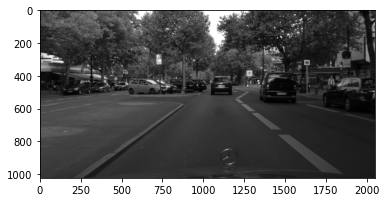

In [39]:
plt.imshow(im_green, cmap='gray')

In [54]:
    kernel = np.array([[-2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2/324, -2/324, -2/324],
                       [-2 / 324, -2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1/324, -2/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, -2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, 11 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, -2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -2 / 324, -2 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1/324, -1/324, -2/324],
                       [-2 / 324, -2 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1 / 324, -1/324, -2/324, -2/324],
                       [-2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2 / 324, -2/324, -2/324, -2/324]]) 

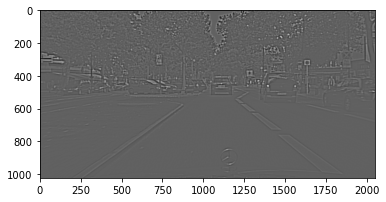

In [57]:
grad = sg.convolve2d(im_red, kernel, boundary='symm', mode='same')
plt.imshow(grad, cmap = 'gray')

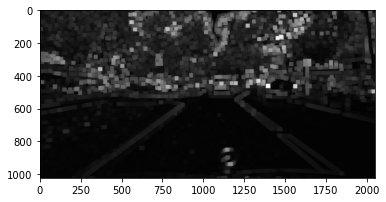

In [58]:
max_im = ndimage.maximum_filter(grad, size=20)
plt.imshow(max_im, cmap='gray')

In [64]:
coord_x, coord_y = [], []
size_ = 20
image_height, image_width = max_im.shape[:2]

for i in range(0, image_height - size_, size_):

    for j in range(0, image_width - size_, size_):

        max_coord = np.argmax(max_im[i:i + size_, j:j + size_])
        x_max = max_coord // size_ + i
        y_max = max_coord % size_ + j
        local_max = max_im[x_max, y_max]

        if local_max > 120:
            coord_x.append(x_max)
            coord_y.append(y_max)

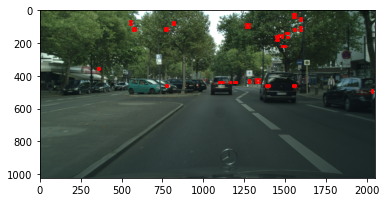

In [65]:
plt.imshow(image)
plt.plot(coord_y, coord_x, 'ro', color='r', markersize=2)